In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [4]:
#Fault(1) or Normal(0)

# Types of faults to be detected
# 0 0 0 0 - No Fault
# 1 0 0 1 - Line:Ground fault (Phase A - Ground)
# 0 0 1 1 - Line:Line fault (Phase A - Phase B)
# 1 0 1 1 - Line:Line:Ground fault (Phase A,B - Ground)
# 0 1 1 1 - Line:Line:Line fault (all 3 phases)
# 1 1 1 1 - Line:Line:Line:Line:Ground fault (Three phase symmetrical fault)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
isFault = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/detect_dataset.csv')
faultClassification = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/classData.csv')

In [7]:
isFault.head(10)

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN
5,0,-55.954681,-1.001882,56.956562,0.193414,-0.590695,0.397281,NaN,NaN
6,0,-45.248446,-2.586980,47.835426,0.212393,-0.584136,0.371743,NaN,NaN
7,0,-47.845420,-3.428094,51.273513,0.216396,-0.590123,0.373727,NaN,NaN
8,0,-43.294259,-4.511300,47.805558,0.229748,-0.587588,0.357840,NaN,NaN
9,0,-43.474722,-5.388233,48.862955,0.235733,-0.591320,0.355587,NaN,NaN


In [8]:
# Drop the last two columns
isFault.drop(isFault.columns[[7,8]], axis=1, inplace=True)
isFault.head()


,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050


In [9]:
isFault.describe()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
count,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000
mean,0.457962,6.709369,-26.557793,22.353043,0.010517,-0.015498,0.004980
std,0.498250,377.158470,357.458613,302.052809,0.346221,0.357644,0.349272
min,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.659921,-0.612709
25%,0.000000,-64.348986,-51.421937,-54.562257,-0.237610,-0.313721,-0.278951
50%,0.000000,-3.239788,4.711283,-0.399419,0.002465,-0.007192,0.008381
75%,1.000000,53.823453,69.637787,45.274542,0.285078,0.248681,0.289681
max,1.000000,885.738571,889.868884,901.274261,0.609864,0.627875,0.608243


In [10]:
isFault.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 656.4 KB


In [11]:
isFault.shape

(12001, 7)

In [12]:
corr = isFault.corr( method= "pearson")

<Axes: >

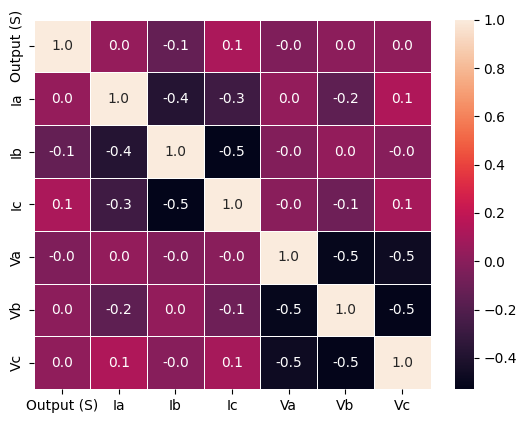

In [13]:
sns.heatmap(corr, annot=True, fmt=".1f", linewidth =.5)
# plt.display()

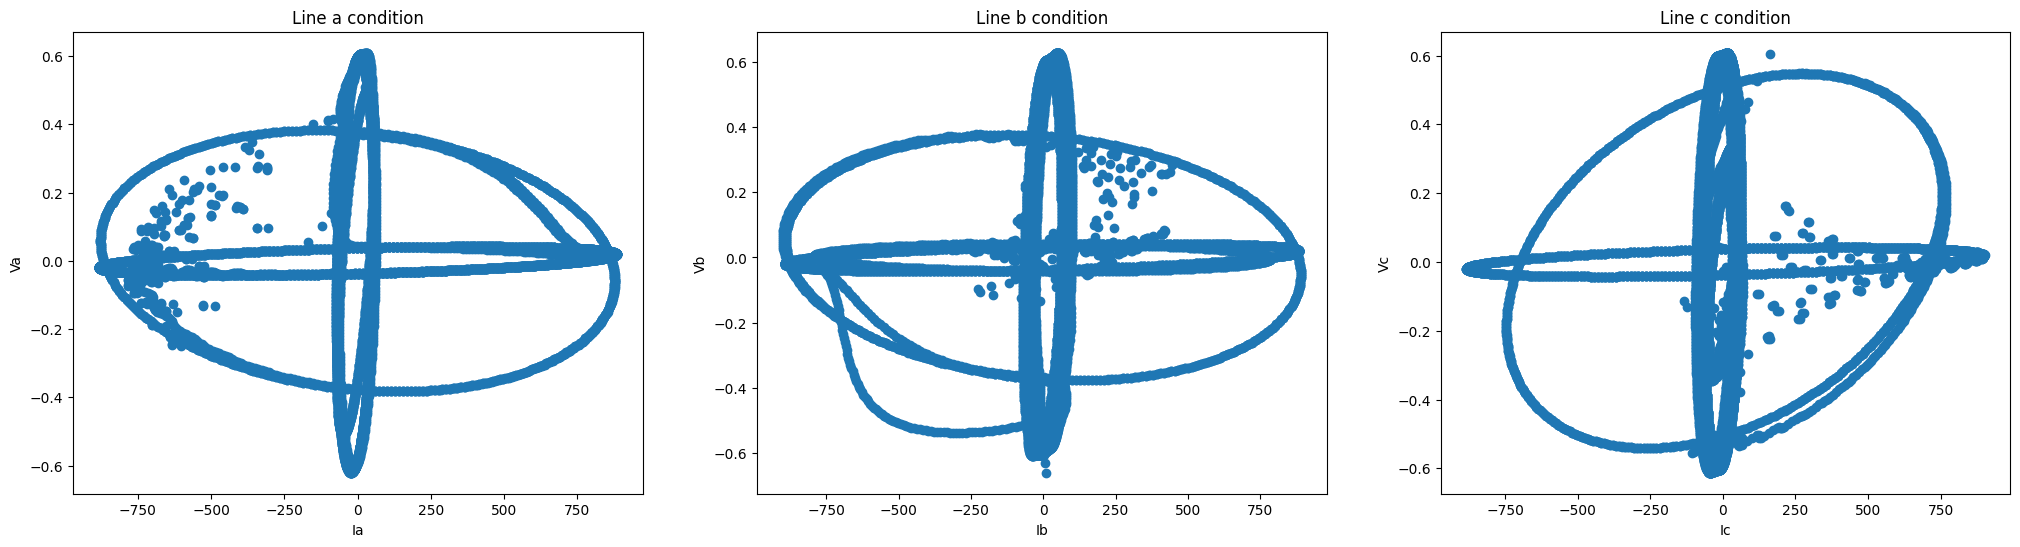

In [17]:
plt.figure(figsize=(25,6))

a1 = plt.subplot2grid((1,3),(0,0))
a1.scatter(isFault['Ia'], isFault['Va'])
a1.set_title('Line a condition')
a1.set_xlabel('Ia')
a1.set_ylabel('Va')

a2 = plt.subplot2grid((1,3),(0,1))
a2.scatter(isFault['Ib'], isFault['Vb'])
a2.set_title('Line b condition')
a2.set_xlabel('Ib')
a2.set_ylabel('Vb')

a3 = plt.subplot2grid((1,3),(0,2))
a3.scatter(isFault['Ic'], isFault['Vc'])
a3.set_title('Line c condition')
a3.set_xlabel('Ic')
a3.set_ylabel('Vc')

plt.show()

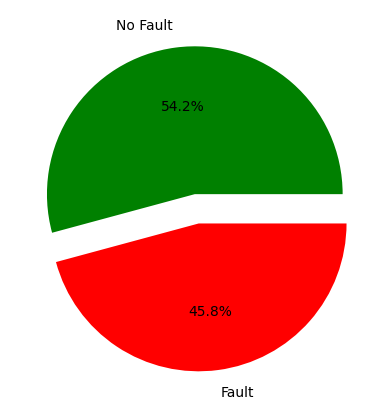

In [18]:
plt.pie(x=isFault['Output (S)'].value_counts(), labels=['No Fault', 'Fault'],
        explode = [0, 0.2], autopct= '%1.1f%%', labeldistance=1.15,
       colors=['green', 'red'])
plt.show()

In [19]:
# Building the binary classifier model

y = isFault.iloc[:,0]
X = isFault.iloc[:,1:7]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9600, 6), (2401, 6), (9600,), (2401,))

In [20]:
# Random Forest Classifier
model_1 = RandomForestClassifier()
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)

In [23]:
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1297
           1       1.00      0.99      1.00      1104

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401



In [24]:
confusion_matrix(y_test, y_pred)

array([[1294,    3],
       [   6, 1098]])

In [25]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)*100:.03f}%')
print(f'Precision Score: {precision_score(y_test, y_pred)*100:.03f}%')
print(f'Recall Score: {recall_score(y_test, y_pred)*100:.03f}%')

Accuracy Score: 99.625%
Precision Score: 99.728%
Recall Score: 99.457%


**# Mutli Class Classification using Random Forest**

In [26]:
faultClassification.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [27]:
faultClassification['faultType'] = faultClassification['G'].astype(str) + faultClassification['C'].astype(str) + faultClassification['B'].astype(str) + faultClassification['A'].astype(str)
faultClassification.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,faultType
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


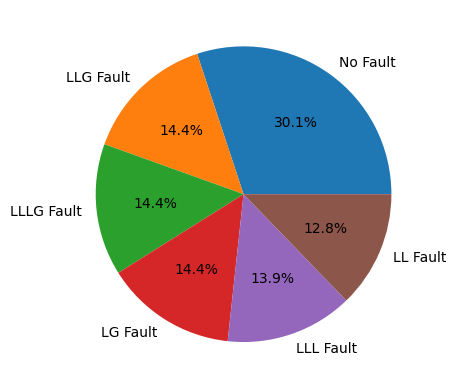

In [29]:
plt.pie(faultClassification['faultType'].value_counts(), autopct='%1.1f%%',
       labels=['No Fault', 'LLG Fault', 'LLLG Fault', 'LG Fault', 'LLL Fault', 'LL Fault'])
plt.show()

In [30]:
## seperate i/p & o/p
X = faultClassification.drop(['G','C','B','A','faultType'], axis=1)
y = faultClassification['faultType']
le = LabelEncoder()
y = le.fit_transform(y)

In [31]:
## Splting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6288, 6), (1573, 6), (6288,), (1573,))

In [32]:
## RF Algo
model_2 = RandomForestClassifier()
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)

In [33]:
confusion_matrix(y_test, y_pred)

array([[468,   0,   0,   0,   0,   0],
       [  0, 202,   0,   0,   0,   0],
       [  0,   0, 139,   0,   0,  92],
       [  0,   0,   0, 220,   0,   0],
       [  0,   0,   0,   2, 224,   0],
       [  0,   0,  95,   0,   0, 131]])

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       468
           1       1.00      1.00      1.00       202
           2       0.59      0.60      0.60       231
           3       0.99      1.00      1.00       220
           4       1.00      0.99      1.00       226
           5       0.59      0.58      0.58       226

    accuracy                           0.88      1573
   macro avg       0.86      0.86      0.86      1573
weighted avg       0.88      0.88      0.88      1573



In [35]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)*100:.03f}%')

Accuracy Score: 87.985%


In [36]:
res = classification_report(y_test, y_pred, output_dict=True)
res.values()

dict_values([{'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 468.0}, {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 202.0}, {'precision': 0.594017094017094, 'recall': 0.6017316017316018, 'f1-score': 0.5978494623655914, 'support': 231.0}, {'precision': 0.990990990990991, 'recall': 1.0, 'f1-score': 0.995475113122172, 'support': 220.0}, {'precision': 1.0, 'recall': 0.9911504424778761, 'f1-score': 0.9955555555555555, 'support': 226.0}, {'precision': 0.5874439461883408, 'recall': 0.5796460176991151, 'f1-score': 0.5835189309576837, 'support': 226.0}, 0.8798474253019708, {'precision': 0.8620753385327377, 'recall': 0.8620880103180989, 'f1-score': 0.8620665103335005, 'support': 1573.0}, {'precision': 0.8798463436583164, 'recall': 0.8798474253019708, 'f1-score': 0.8798338109633321, 'support': 1573.0}])

In [41]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame(res).transpose()

# Print the DataFrame
print(df)

              precision    recall  f1-score      support
0              1.000000  1.000000  1.000000   468.000000
1              1.000000  1.000000  1.000000   202.000000
2              0.594017  0.601732  0.597849   231.000000
3              0.990991  1.000000  0.995475   220.000000
4              1.000000  0.991150  0.995556   226.000000
5              0.587444  0.579646  0.583519   226.000000
accuracy       0.879847  0.879847  0.879847     0.879847
macro avg      0.862075  0.862088  0.862067  1573.000000
weighted avg   0.879846  0.879847  0.879834  1573.000000


Text(0.5, 1.0, 'Class-wise Precision')

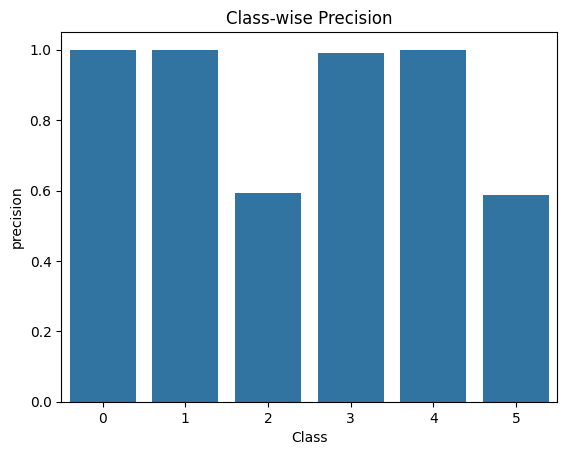

In [42]:
sns.barplot(x=df.index[:-3], y=df['precision'][:-3])
plt.xlabel("Class")
plt.title("Class-wise Precision")

Text(0.5, 1.0, 'Class-wise F1 Score')

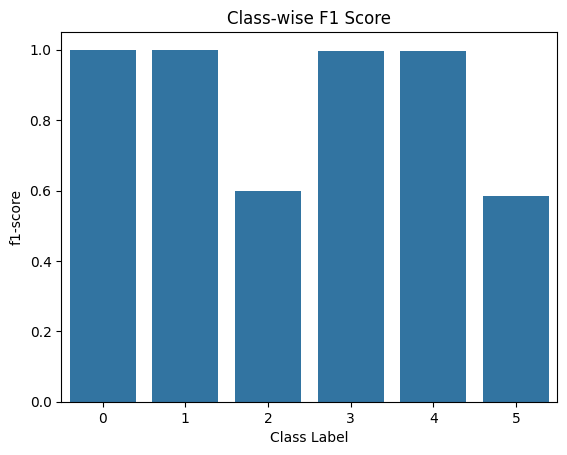

In [43]:
sns.barplot(x=df.index[:-3], y=df['f1-score'][:-3])
plt.xlabel("Class Label")
plt.title("Class-wise F1 Score")